# **Multiple Linear Regression**
Multiple linear regression refers to a statistical technique that is used to predict the outcome of a variable based on the value of two or more vriables.It is sometimes known simply as multiple regression, and it is an extension of linear regression.The variable that we want to predict is known as dependent variable,while the variables we use to predict the value of the dependent variable are known as independent or exploratory variable.
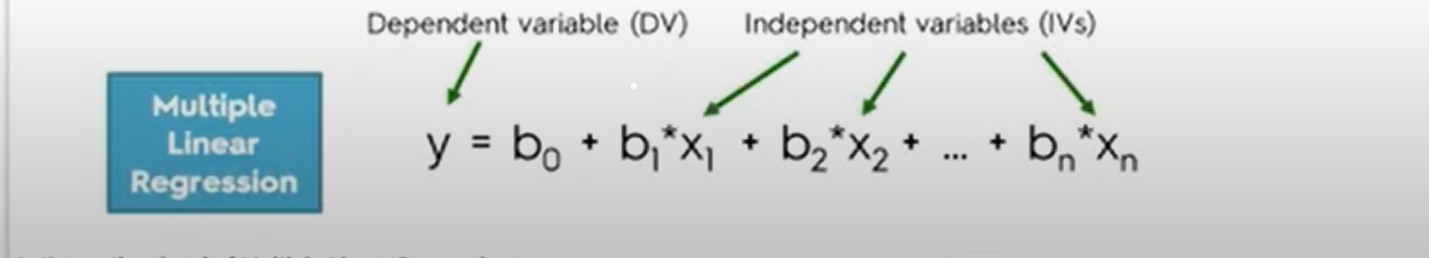

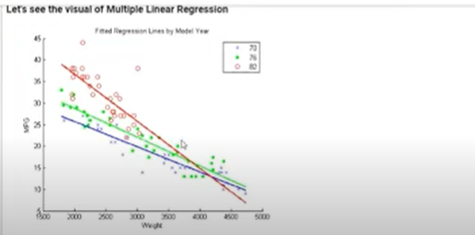

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [2]:
! pip install kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d farhanmd29/50-startups

Dataset URL: https://www.kaggle.com/datasets/farhanmd29/50-startups
License(s): other
50-startups.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
#extracting the compressed file
from zipfile import ZipFile
dataset = '/content/50-startups.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
dataset = pd.read_csv('/content/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
dataset.shape

(50, 5)

In [10]:
dataset.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [11]:
dataset.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [12]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [13]:
X = dataset[['R&D Spend','Administration','Marketing Spend','State']].values
Y = dataset[['Profit']].values

In [14]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [15]:
print(Y)

[[192261.83]
 [191792.06]
 [191050.39]
 [182901.99]
 [166187.94]
 [156991.12]
 [156122.51]
 [155752.6 ]
 [152211.77]
 [149759.96]
 [146121.95]
 [144259.4 ]
 [141585.52]
 [134307.35]
 [132602.65]
 [129917.04]
 [126992.93]
 [125370.37]
 [124266.9 ]
 [122776.86]
 [118474.03]
 [111313.02]
 [110352.25]
 [108733.99]
 [108552.04]
 [107404.34]
 [105733.54]
 [105008.31]
 [103282.38]
 [101004.64]
 [ 99937.59]
 [ 97483.56]
 [ 97427.84]
 [ 96778.92]
 [ 96712.8 ]
 [ 96479.51]
 [ 90708.19]
 [ 89949.14]
 [ 81229.06]
 [ 81005.76]
 [ 78239.91]
 [ 77798.83]
 [ 71498.49]
 [ 69758.98]
 [ 65200.33]
 [ 64926.08]
 [ 49490.75]
 [ 42559.73]
 [ 35673.41]
 [ 14681.4 ]]


<Figure size 1000x1000 with 0 Axes>

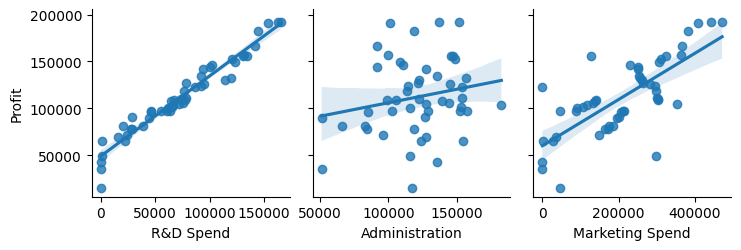

In [27]:
plt.figure(figsize=(10,10))
# The 'annot' parameter is not available in 'pairplot'. Remove it.
sns.pairplot(dataset, y_vars=['Profit'], x_vars=['R&D Spend','Administration','Marketing Spend'], kind='reg', diag_kind='kde')

In [16]:
#"state" column in our dataset has text values so we are converting it into numerical values
ct = ColumnTransformer([("state", OneHotEncoder(),[3])], remainder = 'passthrough')
X = ct.fit_transform(dataset[['R&D Spend','Administration','Marketing Spend','State']].values)
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [18]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print('y_pred:')
print(y_pred)
print('Y_test:')
print(Y_test)

y_pred:
[[111234.77014927]
 [161774.04917632]
 [ 46143.30625744]
 [ 56276.04699201]
 [147778.74737241]
 [114009.61415743]
 [127635.92432762]
 [ 74981.98850651]
 [ 97155.36271562]
 [166200.1910109 ]]
Y_test:
[[108733.99]
 [155752.6 ]
 [ 64926.08]
 [ 49490.75]
 [129917.04]
 [108552.04]
 [134307.35]
 [ 77798.83]
 [ 97483.56]
 [156991.12]]


In [21]:
print(y_pred.sum().mean())
print(Y_test.sum().mean())
print("Accuracy", y_pred.sum().mean()/Y_test.sum().mean())

1103190.0006655185
1083953.3599999999
Accuracy 1.0177467420420363


In [22]:
y_pred,Y_test

(array([[111234.77014927],
        [161774.04917632],
        [ 46143.30625744],
        [ 56276.04699201],
        [147778.74737241],
        [114009.61415743],
        [127635.92432762],
        [ 74981.98850651],
        [ 97155.36271562],
        [166200.1910109 ]]),
 array([[108733.99],
        [155752.6 ],
        [ 64926.08],
        [ 49490.75],
        [129917.04],
        [108552.04],
        [134307.35],
        [ 77798.83],
        [ 97483.56],
        [156991.12]]))

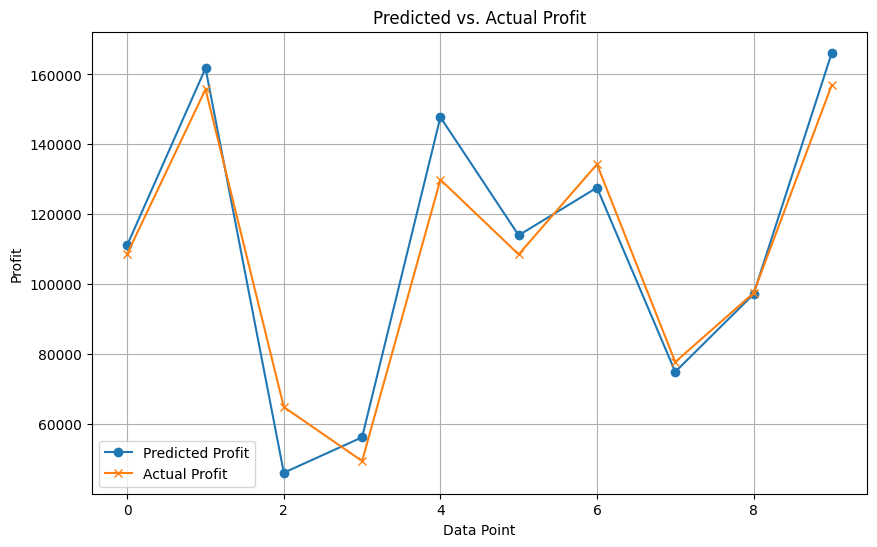

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred, label='Predicted Profit', marker='o')
plt.plot(Y_test, label='Actual Profit', marker='x')
plt.xlabel('Data Point')
plt.ylabel('Profit')
plt.title('Predicted vs. Actual Profit')
plt.legend()
plt.grid(True)
plt.show()